In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset import
dataset = pd.read_csv("Data/Regression/50_Startups.csv")

#dataset.head(10)

X = dataset[["R&D Spend","Administration","Marketing Spend","State"]].values
# == X = dataset[["R&D Spend","Administration","Marketing Spend","State"]] == X = dataset.iloc[:, :-1].values ==  X = dataset.iloc[:, 0:4]
y = dataset[["Profit"]].values
#y = dataset.iloc[:, 4].values
# == dataset[["Profit"]] == dataset.iloc[:, 4].values == dataset.loc[:,["Profit"]]

#print(X)
print(y)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


In [24]:
#Encoding the categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')

In [25]:
X = ct.fit_transform(X)

#Avoiding Dummy variable trap
X = X[:, 1:]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

#MLR
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting
y_pred = regressor.predict(X_test)


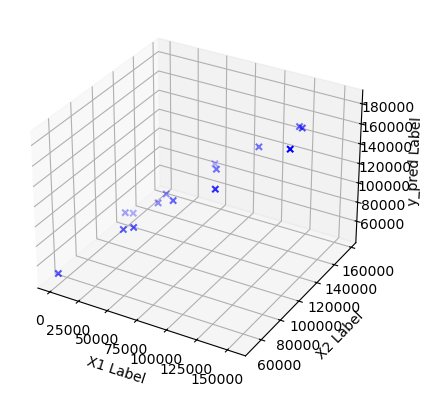

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = X_test[:, [2]]
x2 = X_test[:, [3]]
ax.scatter(x1,x2, y_pred, c='b', marker='x')
ax.set_xlabel("X1 Label")
ax.set_ylabel("X2 Label")
ax.set_zlabel("y_pred Label")
plt.show()

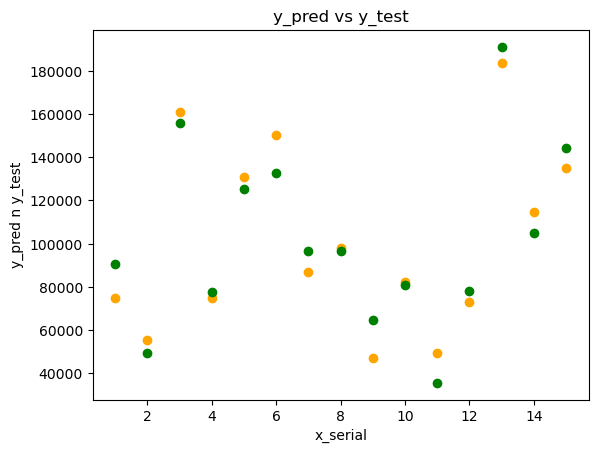

In [26]:
#y_pred vs y_test
x_serial = list(range(1, len(y_pred)+1))
plt.scatter(x_serial, y_pred, color = 'orange')
plt.scatter(x_serial, y_test, color = 'green')
plt.title("y_pred vs y_test")
plt.xlabel("x_serial")
plt.ylabel("y_pred n y_test")
plt.show()
